In [4]:
import pandas as pd
import matplotlib.pyplot as plt
#print( 'a')
cov=pd.read_csv('cov19clean.csv',delimiter=',')
ebola=pd.read_csv('ebolaclean.csv',delimiter=',')
mers=pd.read_csv('mers.csv',delimiter=',')
sars=pd.read_csv('sars.csv',delimiter=',')
h1n1=pd.read_csv('Pandemic (H1N1) 2009.csv',delimiter=',',encoding='unicode_escape')
countries=pd.read_csv('Life Expectancy Data.csv',delimiter=',')

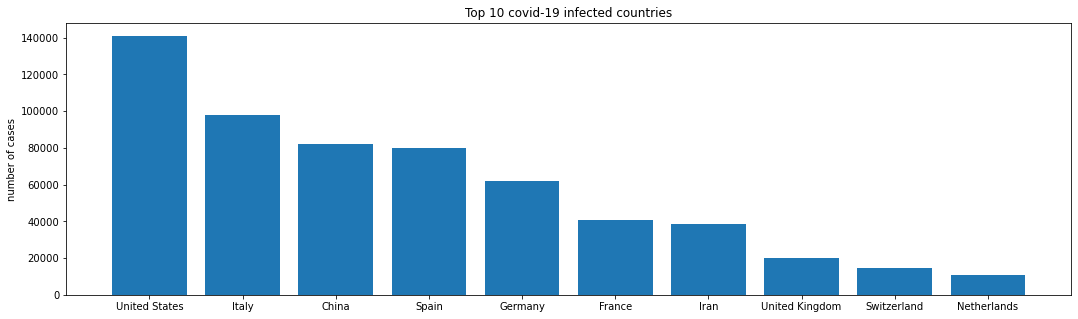

In [5]:
cov = cov[['Country','Date', 'Confirmed', 'Deaths', 'Recovered']]
cov['Country'] = cov['Country'].replace('Mainland China', 'China')
cov['Country'] = cov['Country'].replace('Macau', 'China')
cov['Country'] = cov['Country'].replace('Taiwan', 'China')
cov['Country'] = cov['Country'].replace('Hong Kong', 'China')
cov['Country'] = cov['Country'].replace('US', 'United States')
cov=cov[cov['Date']==max(cov['Date'])]
covdes=cov.groupby(['Country']).sum().reset_index().sort_values(by='Confirmed',ascending=False)
country=covdes['Country'].head(10).tolist()
Confirmed=covdes['Confirmed'].head(10).tolist()
death=covdes['Deaths'].head(10).tolist()
f, ax=plt.subplots(figsize=(18,5))
plt.bar(country, Confirmed,label='confirmed' )
plt.ylabel('number of cases')
plt.title('Top 10 covid-19 infected countries')
plt.show()

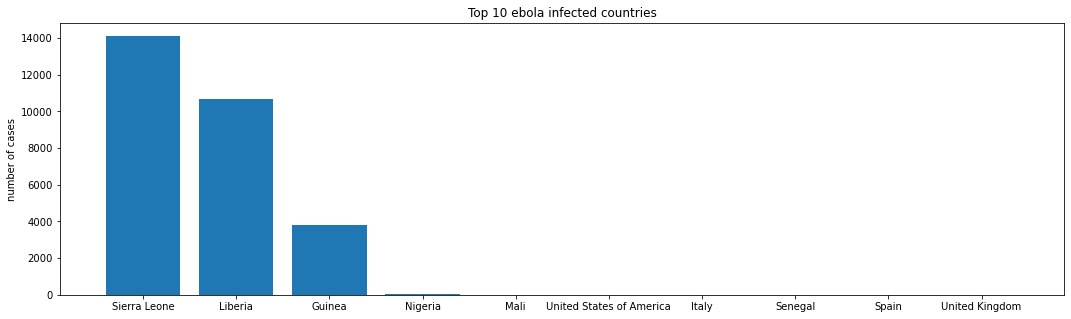

In [6]:
#print (ebola)
ebola = ebola[['Country','Date', 'No. of confirmed, probable and suspected cases', 'No. of confirmed, probable and suspected deaths']]
ebola.columns=['country','date','confirm','death']

ebola=ebola[ebola['date']==max(ebola['date'])]

ebodes=ebola.groupby(['country']).sum().reset_index().sort_values(by='confirm',ascending=False)
ebcountry=ebodes['country'].head(10).tolist()
ebconfirm=ebodes['confirm'].head(10).tolist()
f, ax=plt.subplots(figsize=(18,5))
plt.bar(ebcountry, ebconfirm,label='confirmed' )
plt.ylabel('number of cases')
plt.title('Top 10 ebola infected countries')
#plt.bar(country,death,label='deaths')
plt.show()

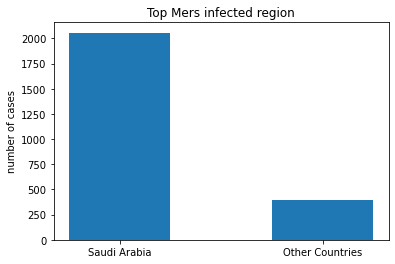

In [7]:
mers = mers[['Week','Region','New Cases']]
mers.columns=['date','region','confirm']
mers['region'] = mers['region'].replace('Republic of Korea', 'Other Countries')

mersdes=mers.groupby(['region']).sum().reset_index().sort_values(by='confirm',ascending=False)
mresreg=mersdes['region'].head(10).tolist()
mrescon=mersdes['confirm'].head(10).tolist()
#f, ax=plt.subplots(figsize=(18,5))
plt.bar(mresreg, mrescon,0.5,label='confirmed' )
plt.ylabel('number of cases')
plt.title('Top Mers infected region')
#plt.bar(country,death,label='deaths')
plt.show()

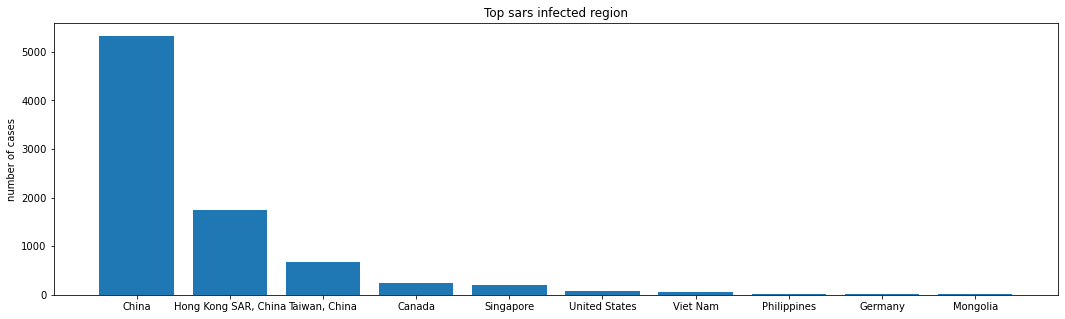

In [8]:
sars = sars[['Date','Country','Cumulative number of case(s)','Number of deaths','Number recovered']]
sars.columns=['date','region','case','death','recover']
sars['region'] = sars['region'].replace('Hong Kong SAR,China', 'Hong Kong,China')
sars=sars[sars['date']==max(sars['date'])]

sarsdes=sars.groupby(['region']).sum().reset_index().sort_values(by='case',ascending=False)
sarscou=sarsdes['region'].head(10).tolist()
sarscase=sarsdes['case'].head(10).tolist()
f, ax=plt.subplots(figsize=(18,5))
plt.bar(sarscou, sarscase,label='confirmed' )
plt.ylabel('number of cases')
plt.title('Top sars infected region')
#plt.bar(country,death,label='deaths')
plt.show()

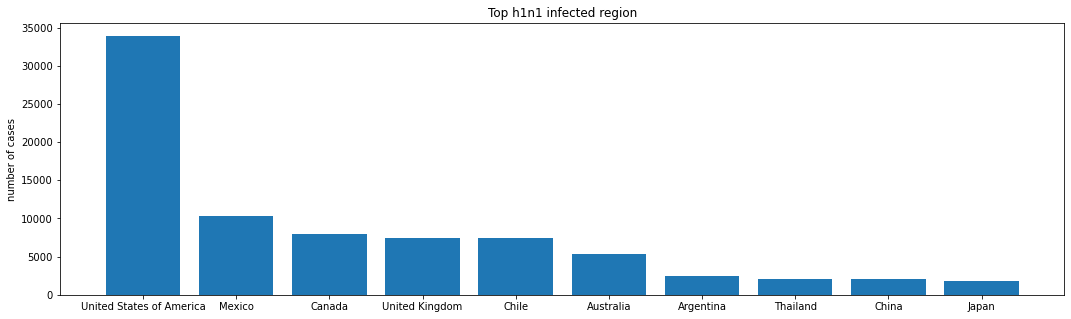

In [9]:
h1n1 = h1n1[['Country','Cases','Deaths','Update Time']]
h1n1.columns=['country','case','death','date']

h1n1=h1n1[h1n1.country!='Grand Total']
h1n1=h1n1[h1n1['date']==max(h1n1['date'])]
h1des=h1n1.groupby(['country']).sum().reset_index().sort_values(by='case',ascending=False)
h1cou=h1des['country'].head(10).tolist()
h1case=h1des['case'].head(10).tolist()
f, ax=plt.subplots(figsize=(18,5))
plt.bar(h1cou, h1case,label='case' )
plt.ylabel('number of cases')
plt.title('Top h1n1 infected region')
#plt.bar(country,death,label='deaths')
plt.show()


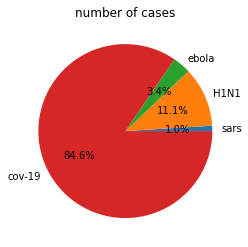

In [10]:
sarcase=sars['case'].sum()
h1case=h1n1['case'].sum()
ebocase=ebola['confirm'].sum()
covcase=cov['Confirmed'].sum()
labels=['sars','H1N1','ebola','cov-19']
cases=[sarcase,h1case,ebocase,covcase]
plt.pie(cases,labels=labels,autopct='%1.1f%%')
plt.title('number of cases')
plt.show()

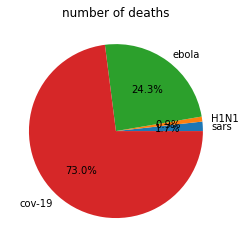

In [11]:
sarcasedea=sars['death'].sum()
h1casedea=h1n1['death'].sum()
ebocasedea=ebola['death'].sum()
covcasedea=cov['Deaths'].sum()
deca=[sarcasedea,h1casedea,ebocasedea,covcasedea]
plt.pie(deca,labels=labels,autopct='%1.1f%%')
plt.title('number of deaths')
plt.show()

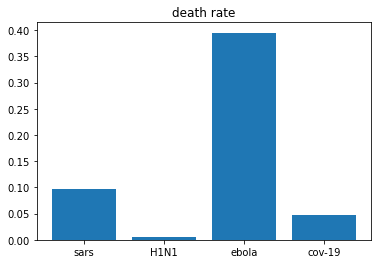

In [12]:
ebrate=ebocasedea/ebocase
h1rate=h1casedea/h1case
covrate=covcasedea/covcase
sarrate=sarcasedea/sarcase
raca=[sarrate,h1rate,ebrate,covrate]
plt.bar(labels,raca)
plt.title('death rate')
plt.show()

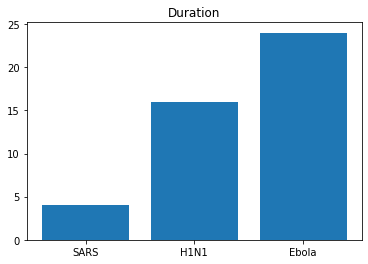

In [13]:
lasting=[4,16,24]
diease=['SARS','H1N1','Ebola']
plt.bar(diease,lasting)
plt.title('Duration')
plt.show()

In [14]:
countries = countries[['Country','Year','Status','Population']]

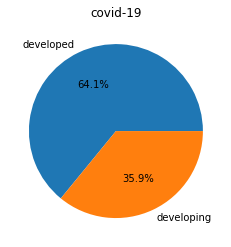

In [15]:
#cov
covcountry=countries[countries['Year']==max(countries['Year'])].reset_index()
covtot=pd.merge(left=covdes,right=covcountry, left_on='Country',right_on='Country')

covtot=covtot[['Status','Confirmed']]
covtot=covtot.groupby(['Status']).sum().reset_index()

covlabel=['developed','developing']
covda=[covtot.at[0,'Confirmed'],covtot.at[1,'Confirmed']]
plt.pie(covda,labels=covlabel,autopct='%1.1f%%')
plt.title('covid-19')
plt.show()

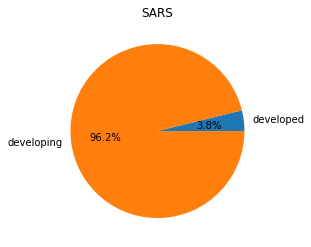

In [16]:
#sars
sarcountry=countries[countries['Year']==2003].reset_index()
sart=pd.merge(left=sarsdes,right=sarcountry, left_on='region',right_on='Country')

sart=sart[['Status','case']]
sart=sart.groupby(['Status']).sum().reset_index()

sarda=[sart.at[0,'case'],sart.at[1,'case']]
plt.pie(sarda,labels=covlabel,autopct='%1.1f%%')
plt.title('SARS')
plt.show()

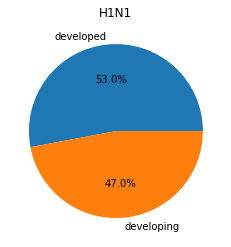

In [17]:
#h1n1
h1c=countries[countries['Year']==2009].reset_index()
h1t=pd.merge(left=h1des,right=h1c, left_on='country',right_on='Country')

h1t=h1t[['Status','case']]
h1t=h1t.groupby(['Status']).sum().reset_index()

h1da=[h1t.at[0,'case'],h1t.at[1,'case']]
plt.pie(h1da,labels=covlabel,autopct='%1.1f%%')
plt.title('H1N1')
plt.show()

       Status  confirm
0   Developed      6.0
1  Developing  28635.0


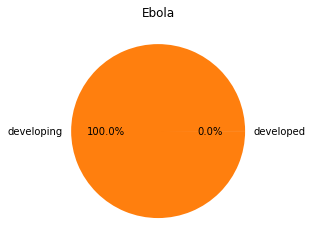

In [18]:
#ebola
ebocoun=countries[countries['Year']==2015].reset_index()
ebotot=pd.merge(left=ebodes,right=ebocoun, left_on='country',right_on='Country')

ebotot=ebotot[['Status','confirm']]
ebotot=ebotot.groupby(['Status']).sum().reset_index()
print(ebotot)
eboda=[ebotot.at[0,'confirm'],ebotot.at[1,'confirm']]
plt.pie(eboda,labels=covlabel,autopct='%1.1f%%')
plt.title('Ebola')
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


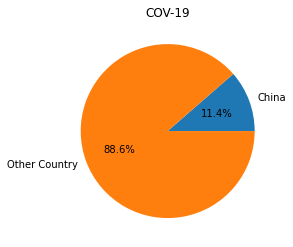

In [19]:
chsrc=covdes[covdes['Country']=='China'].groupby(['Country']).sum().reset_index()
covsrcsum=chsrc['Confirmed']
covsum=cov['Confirmed'].sum()
cvother=covsum-covsrcsum
cvname=['China','Other Country']
cvdat=[covsrcsum,cvother]
plt.pie(cvdat,labels=cvname,autopct='%1.1f%%')
plt.title('COV-19')
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


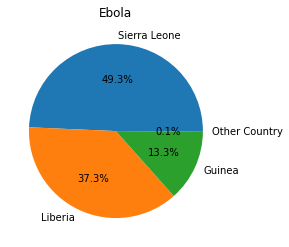

In [20]:
ebsrc1=ebodes[ebodes['country']=='Sierra Leone'].groupby(['Country']).sum().reset_index()
ebsrc1=ebsrc1['confirm']
ebsrc2=ebodes[ebodes['country']=='Liberia'].groupby(['Country']).sum().reset_index()
ebsrc2=ebsrc2['confirm']
ebsrc3=ebodes[ebodes['country']=='Guinea'].groupby(['Country']).sum().reset_index()
ebsrc3=ebsrc3['confirm']

ebsum=ebodes['confirm'].sum()
ebsum=ebsum-ebsrc1-ebsrc2-ebsrc3
cvname=['Sierra Leone','Liberia','Guinea','Other Country']
cvdat=[ebsrc1,ebsrc2,ebsrc3 ,ebsum]
plt.pie(cvdat,labels=cvname,autopct='%1.1f%%')
plt.title('Ebola')
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


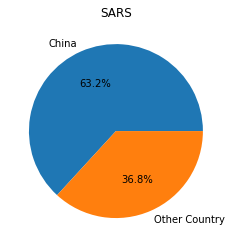

In [21]:
sarsrc=sars[sars['region']=='China'].groupby(['region']).sum().reset_index()
sarsrc=sarsrc['case']

sarsum=sars['case'].sum()
sarsum=sarsum-sarsrc
cvname=['China','Other Country']
cvdat=[sarsrc ,sarsum]
plt.pie(cvdat,labels=cvname,autopct='%1.1f%%')
plt.title('SARS')
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


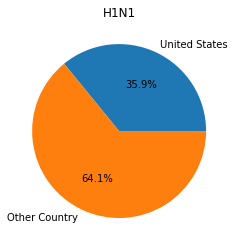

In [22]:
h1src=h1n1[h1n1['country']=='United States of America'].groupby(['country']).sum().reset_index()
h1src=h1src['case']

h1sum=h1n1['case'].sum()
h1sum=h1sum-h1src
cvname=['United States','Other Country']
cvdat=[h1src ,h1sum]
plt.pie(cvdat,labels=cvname,autopct='%1.1f%%')
plt.title('H1N1')
plt.show()

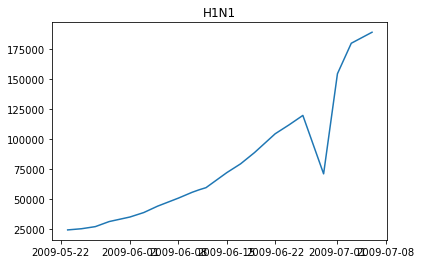

In [23]:
h1date=pd.read_csv('Pandemic (H1N1) 2009.csv',delimiter=',',encoding='unicode_escape').groupby(['Update Time']).sum()
h1date=h1date.sort_values(by='Update Time').reset_index()

h1date['date']=pd.Series( [pd.to_datetime(date) for date in h1date['Update Time']])
h1date['date']=h1date['date'].dt.date
h1date=h1date.sort_values(by='date').reset_index()
time1=h1date['date'].tolist()
case1=h1date['Cases'].tolist()
plt.plot(time1,case1)
plt.title('H1N1')

plt.show()

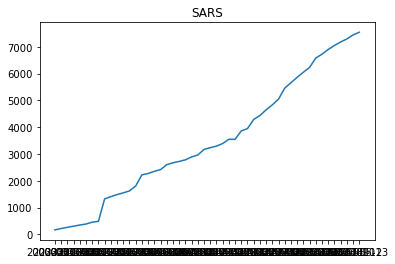

In [24]:
sarsdate=pd.read_csv('sars.csv',delimiter=',',encoding='unicode_escape').groupby(['Date']).sum()
sarsdate=sarsdate.sort_values(by='Date').reset_index()

time2=sarsdate['Date'].head(50).tolist()
case2=sarsdate['Cumulative number of case(s)'].head(50).tolist()
plt.plot(time2,case2)
plt.title('SARS')

plt.show()

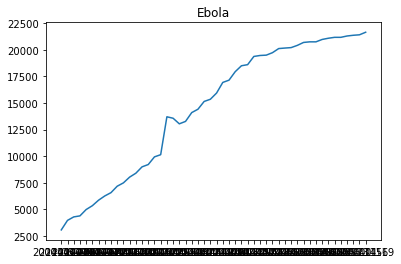

In [25]:
ebdate=pd.read_csv('ebolaclean.csv',delimiter=',',encoding='unicode_escape').groupby(['Date']).sum()
ebdate=ebdate.sort_values(by='Date').reset_index()

time3=ebdate['Date'].head(50).tolist()
case3=ebdate['No. of confirmed, probable and suspected cases'].head(50).tolist()
plt.plot(time3,case3)
plt.title('Ebola')
plt.show()

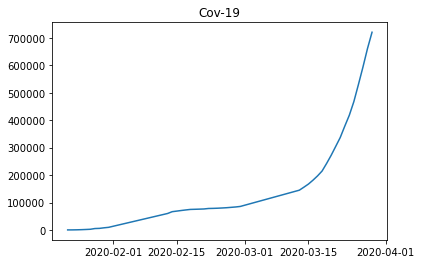

In [26]:
covdate=pd.read_csv('cov19clean.csv',delimiter=',',encoding='unicode_escape').groupby(['Date']).sum()
covdate=covdate.sort_values(by='Date').reset_index()

covdate['Date']=pd.Series( [pd.to_datetime(date) for date in covdate['Date']])
covdate=covdate[covdate['Date'].dt.year==2020].reset_index()

time4=covdate['Date'].head(50).tolist()
case4=covdate['Confirmed'].head(50).tolist()
plt.plot(time4,case4)
plt.title('Cov-19')
plt.show()